In [1]:
import tensorflow as tf

# Load cifar dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

2024-05-16 16:53:35.733322: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 16:53:35.735571: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 16:53:35.763905: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 16:53:36.288112: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
x_train.shape

(50000, 32, 32, 3)

In [3]:
y_train.shape

(50000, 1)

In [4]:
# Normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
# Convert the label into the categorical crossentropy

y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
def create_model():
    # Define Input layer
    inputs = tf.keras.layers.Input(shape=(32, 32, 3))
    
    # Feature extraction layer
    x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2), activation='relu', padding='same')(inputs)
    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same')(x)
    x = tf.keras.layers.Dropout(0.1)(x)

    x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(32, kernel_size=(1, 1), strides=(2, 2), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same')(x)
    x = tf.keras.layers.Dropout(0.1)(x)

    x = tf.keras.layers.Conv2D(32, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding='same')(x)
    
    # MLP layer
    x = tf.keras.layers.Flatten()(x)
    #x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)

    # Encorporate feature extraction layer and output layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

    # Combine input and output layer
    return tf.keras.Model(inputs, outputs)

In [7]:
model = create_model()

2024-05-16 16:53:40.742414: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-16 16:53:40.742681: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 16, 16, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 32)       │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 32)       │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,658 (233.04 KB)

 Trainable params: 59,658 (233.04 KB)

 Non-trainable params: 0 (0.00 B)

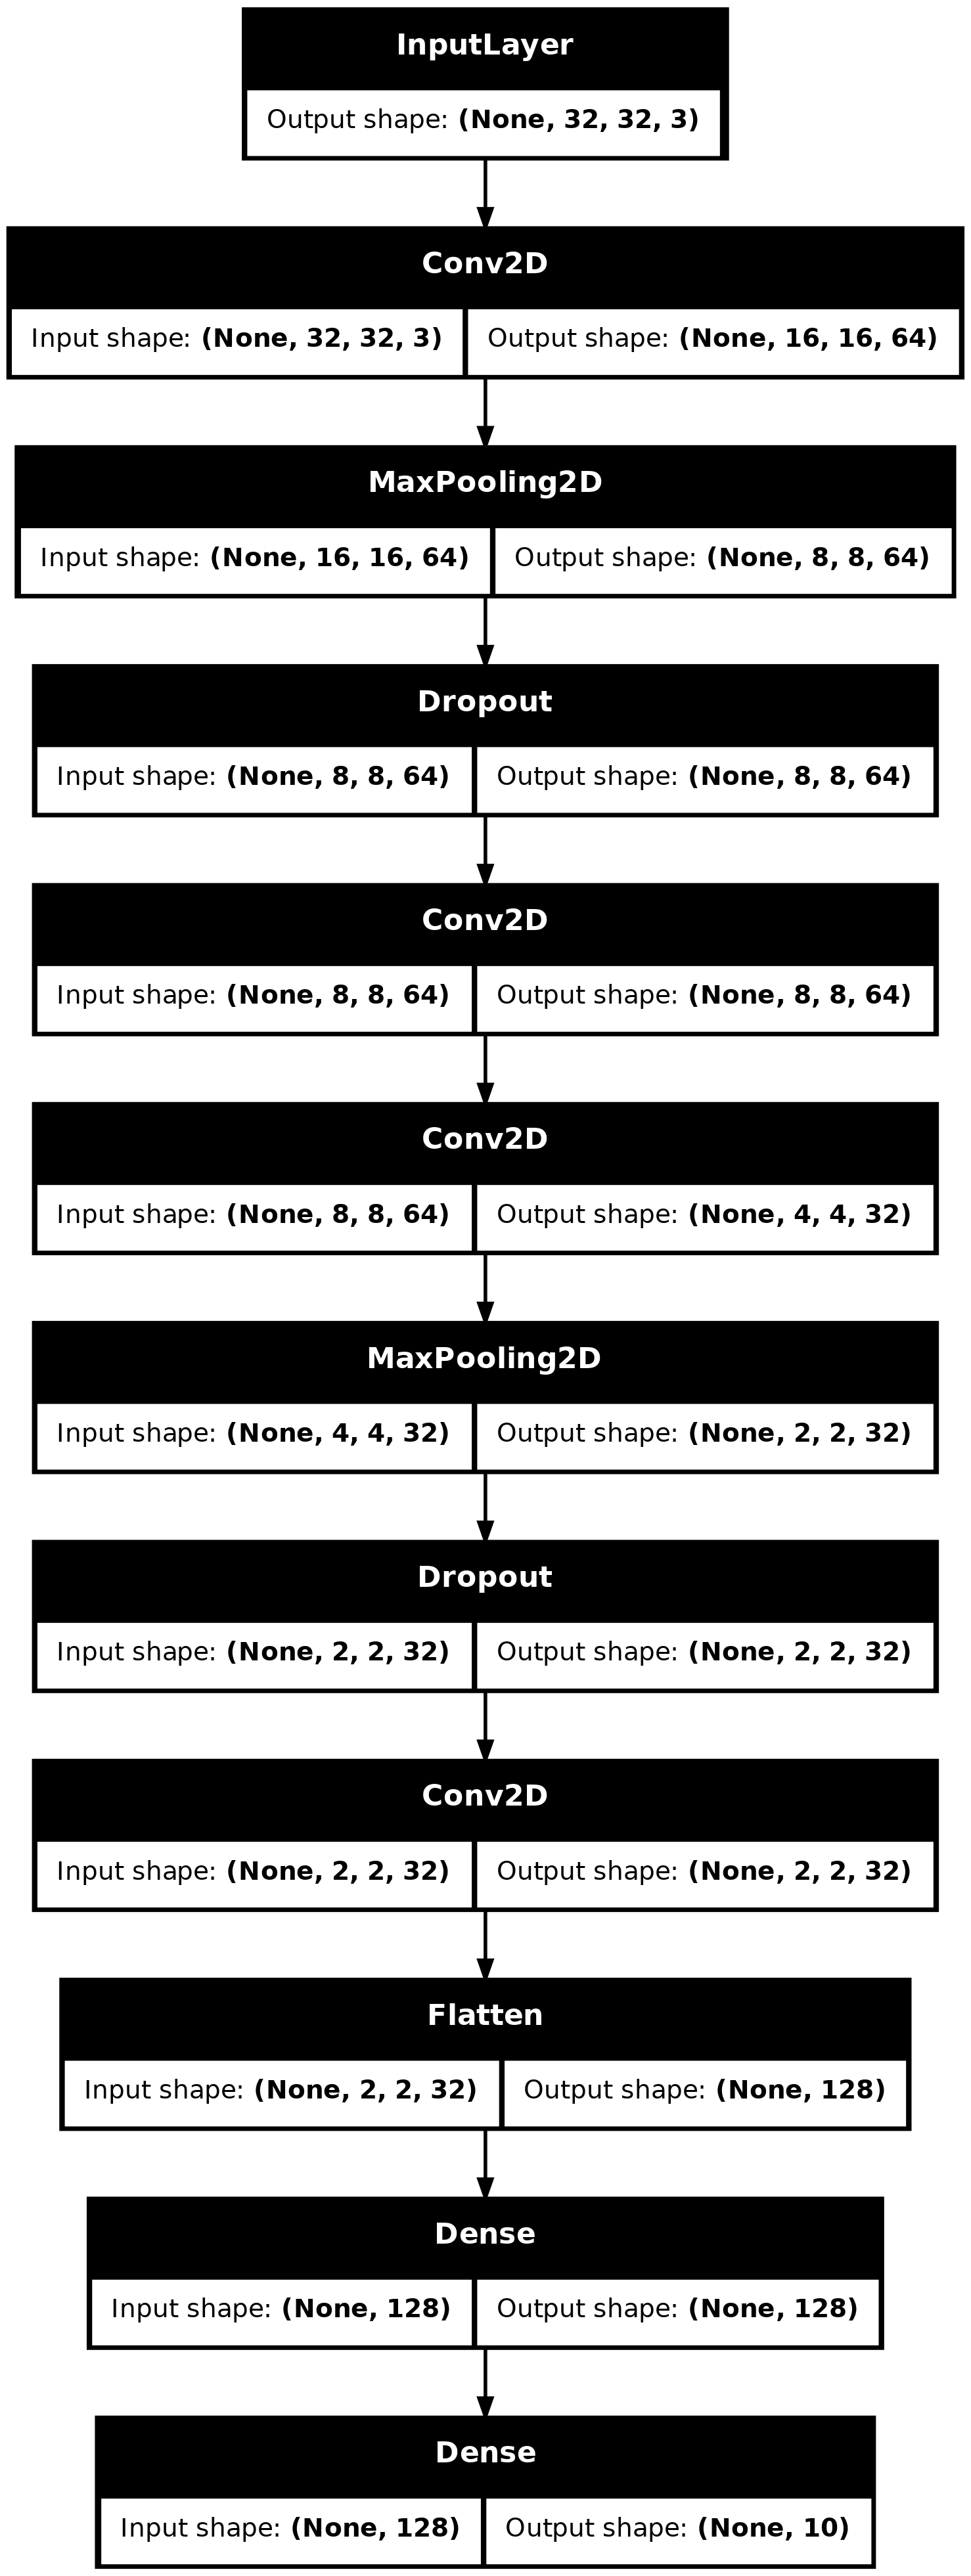

In [9]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [9]:
LEARNING_RATE = 0.001
EPOCHS = 15
#BATCH_SIZE = 128

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
with tf.device('/gpu:0'):
    history = model.fit(
        x=x_train,
        y=y_train_categorical,
        validation_data=(x_test, y_test_categorical),
        #batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        verbose=1
    )

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2860 - loss: 1.8974 - val_accuracy: 0.4778 - val_loss: 1.4167
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4678 - loss: 1.4536 - val_accuracy: 0.5227 - val_loss: 1.3233
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5132 - loss: 1.3383 - val_accuracy: 0.5637 - val_loss: 1.1987
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5421 - loss: 1.2620 - val_accuracy: 0.5801 - val_loss: 1.1675
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5623 - loss: 1.2100 - val_accuracy: 0.5621 - val_loss: 1.2540
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5766 - loss: 1.1641 - val_accuracy: 0.6076 - val_loss: 1.0970
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5915 - loss: 1.1320 - val_accuracy: 0.6067 - val_loss: 1.0982
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6072 - loss: 1

In [12]:
history.history

{'accuracy': [0.3664799928665161,
  0.4774799942970276,
  0.5204799771308899,
  0.5460399985313416,
  0.564740002155304,
  0.5790799856185913,
  0.5904600024223328,
  0.6048399806022644,
  0.6120799779891968,
  0.617900013923645,
  0.6235399842262268,
  0.630840003490448,
  0.6358799934387207,
  0.643280029296875,
  0.6486799716949463],
 'loss': [1.7020766735076904,
  1.42423677444458,
  1.3199142217636108,
  1.2545710802078247,
  1.2043665647506714,
  1.164028286933899,
  1.1346162557601929,
  1.1052762269973755,
  1.0834758281707764,
  1.0623188018798828,
  1.0451384782791138,
  1.0268696546554565,
  1.014290690422058,
  0.9964479804039001,
  0.9821975231170654],
 'val_accuracy': [0.47780001163482666,
  0.5227000117301941,
  0.5637000203132629,
  0.5800999999046326,
  0.5620999932289124,
  0.6075999736785889,
  0.6067000031471252,
  0.6166999936103821,
  0.6100999712944031,
  0.6241000294685364,
  0.6370999813079834,
  0.6281999945640564,
  0.6406999826431274,
  0.6402999758720398,
 

In [13]:
import os

print(os.getcwd())

#os.chdir('visual_transformer')

print(os.getcwd())

/home/andro/dev_tf
/home/andro/dev_tf/visual_transformer


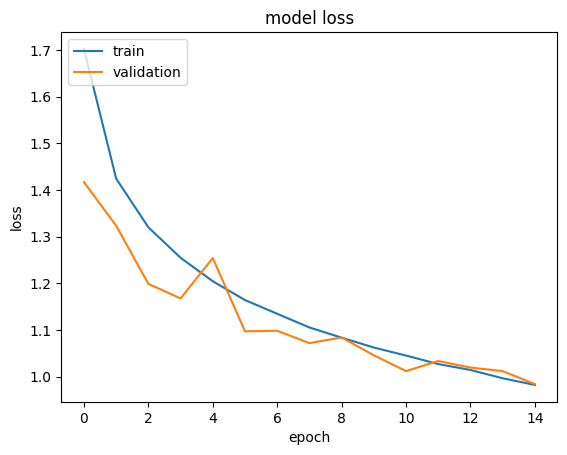

In [14]:
from modules.evaluation import plot_loss, plot_accuracy, confusion_matrix

plot_loss(
    loss = history.history['loss'],
    val_loss = history.history['val_loss']
)

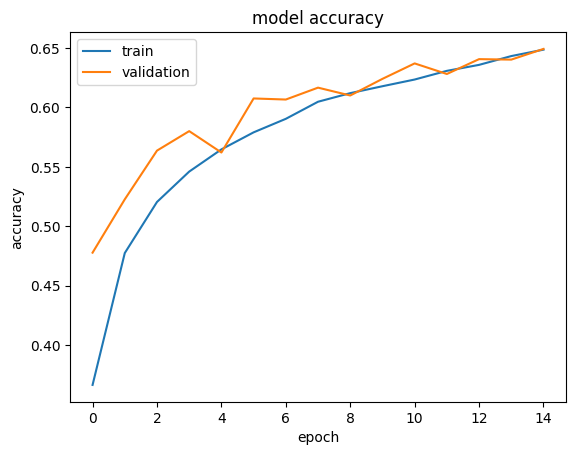

In [15]:
plot_accuracy(
    accuracy = history.history['accuracy'],
    val_accuracy = history.history['val_accuracy']
)

In [16]:
# Get Y Pred
prediction = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [17]:
y_test_pred = [pred.argmax(axis=0) for pred in prediction]

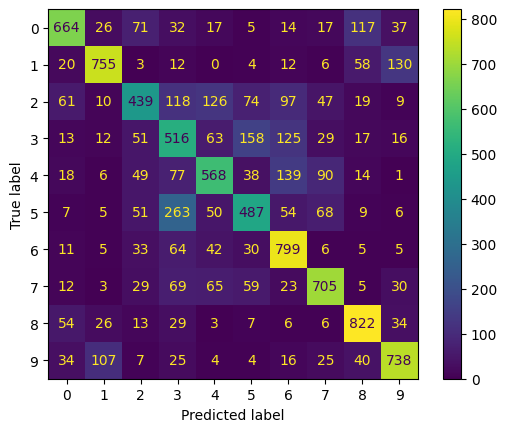

In [18]:
# Plot confusion matrix

confusion_matrix(
    y_true=y_test,
    y_pred=y_test_pred
)